# Time Series

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import Files

In [33]:
full_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Full.csv")
full_df["Date"] = pd.to_datetime(full_df["Date"], format="%Y-%m-%d")
full_df = full_df[full_df["Date"] >= pd.Timestamp(2019,1,1)].reset_index().drop(columns=["index"])
full_df.sort_values(by=["Date", "Hour"], inplace=True)

pred_df = pd.read_csv("../../../Data_thesis/Full_Datasets/rfg_Predictions.csv")
pred_df.sort_values(by=["Date", "Hour"], inplace=True)

In [34]:
pred_df.head()

,Date,Hour,Sensor,SensorLongitude,SensorLatitude,CrowdednessCount
0,2019-01-01,100,GAWW-03,4.897334,52.372524,1515
2016,2019-01-01,100,GAWW-07,4.900441,52.374414,1648
4032,2019-01-01,100,GAWW-01,4.899847,52.374601,1623
6048,2019-01-01,100,GAWW-02,4.898903,52.373786,1612
8064,2019-01-01,100,GAWW-04,4.897908,52.373283,1519


In [35]:
full_df.head()

,Date,Hour,Nieuwmarkt Lat,Nieuwmarkt Lon,Nieuwezijds Kolk Lat,Nieuwezijds Kolk Lon,Dam Lat,Dam Lon,Spui Lat,Spui Lon,...,Nieuwmarkt score,Nieuwmarkt weight,Nieuwezijds Kolk score,Nieuwezijds Kolk weight,Dam score,Dam weight,Spui score,Spui weight,Centraal Station score,Centraal Station weight
44,2019-01-01,100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,615.778610,1.107515,1.145154,0.042413,-25.481470,-1.498910,-0.0,-2.628303,4363.422270,1.034722
45,2019-01-01,100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,564.399854,1.015108,11.372339,0.421198,-6.014425,-0.353790,-0.0,-0.972760,1823.331290,0.432376
46,2019-01-01,100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,533.191297,0.958977,12.960231,0.480009,-3.778391,-0.222258,-0.0,-0.814280,1544.987616,0.366371
47,2019-01-01,100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,528.647173,0.950804,16.327038,0.604705,-4.809838,-0.282932,-0.0,-1.073950,2601.531741,0.616915
48,2019-01-01,100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,490.470648,0.882141,15.863076,0.587521,-1.205387,-0.070905,-0.0,-0.681885,1461.947706,0.346680


## Plots

In [41]:
x = pred_df[pred_df["Sensor"] == "GAWW-03"]["CrowdednessCount"].values.reshape(-1,1)
y = full_df[full_df["Sensor"] == "GAWW-03"]["CrowdednessCount"].values.reshape(-1,1)
dates = full_df[full_df["Sensor"] == "GAWW-03"]["Date"].values.reshape(-1,1)

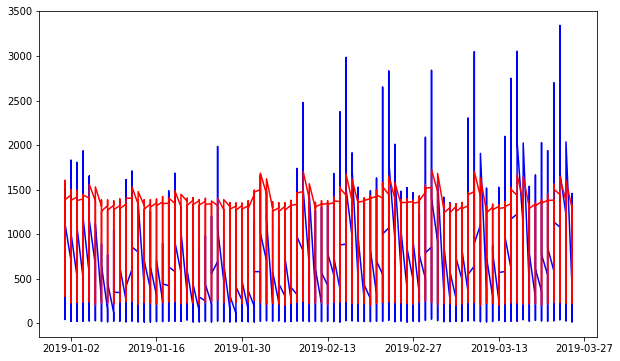

In [43]:
plt.figure(figsize=(10,6))
plt.plot(dates,y, "b")
plt.plot(dates,x, "r")